# **AP155 Lab Assignment**
## Module 4: Ordinary Differential Equations

_Instructions_: Answer each problem as completely as you can. Discuss **all** your answers as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points**.


### Student Information

_Full Name (Last Name, First Name)_: Danac, Nathan Gabriel C.\
_Student No._: 2021-12517\
_Section_: THU-HX-3

### Submission Information

_Date and Time Submitted (most recent upload)_: November 23, 2023

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name: Nathan Gabriel C. Danac**

### Grading Information (c/o Lab Instructor)

TOTAL SCORE: **[]**/100

Score breakdown:
* Problem 1 - []/50
* Problem 2 - []/50

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_

### PROBLEM 1
**The Lotka-Volterra equations**

_Refer to Exercise 8.2 in the Newman text._ The Lotka-Volterra equations are a mathematical model of predator-prey interactions between biological species. Let two variables $x$ and $y$ be proportional to the size of the populations of two species, traditionally called "rabbits" (the prey) and "foxes" (the predators). You could think of $x$ and $y$ as being the population in thousands, say, so that $x = 2$ means there are 2000 rabbits.

In the Lotka-Volterra model the rabbits reproduce at a rate proportional to their population, but are eaten by the foxes at a rate proportional to both their own population and the population of foxes:

$$\frac{{\rm d}x}{{\rm d}t} = \alpha x - \beta xy,$$

where $\alpha$ and $\beta$ are constants. At the same time the foxes reproduce at a rate proportional to the rate at which they eat rabbits-- because they need food to grow and reproduce-- but also die of old age at a rate proportional to their own population:

$$\frac{{\rm d}y}{{\rm d}t}  = \gamma xy - \delta y,$$

where $\gamma$ and $\delta$ are also constants. *(25 pts.)*

1. Solve these equations using the fourth-order Runge-Kutta method for the case $\alpha = 1, \beta = \gamma = 0.5$, and $\delta = 2$, starting from the initial condition $x = y = 2$.

2. Make a graph showing both $x$ and $y$ as a function of time on the same axes from $t =0$ to $t = 30$. *(25 pts.)*

As always, we begin by importing the necessary modules

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

Next, we define our function `f`. We take the inputs `r` and `t`, where
$$r = [x, y]$$
and return the array
$$\left[\frac{dx}{dt}, \frac{dy}{dt}\right]$$

In [2]:
def f(r, t):
  x = r[0]
  y = r[1]
  fx = alpha*x - beta*x*y
  fy = gamma*x*y - delta*y

  return np.array([fx, fy], float)

#Define the constants used in f
alpha = 1.0
beta = 0.5
gamma = 0.5
delta = 2.0

Next, we need to write a function for the fourth-order Runge-Kutta method.

\begin{align}
  k_1 &= hf(r, t)\\
  k_2 &= hf\left(r + \frac{1}{2}k_1, t + \frac{1}{2}h\right)\\
  k_3 &= hf\left(r + \frac{1}{2}k_2, t + \frac{1}{2}h\right)\\
  k_4 &= hf(r + k_3, t + h)\\\\
  r(t + h) &= r(t) + \frac{1}{6}(k_1 + 2k_2 + 3k_3 + k_4)
\end{align}

Recall Euler's method, which finds the derivative at a given point $x(t)$ by taking the slope $dx/dt$. Technically, this is the first-order Runge-Kutta method, with error $O(h^2)$. By instead finding the slope at some midpoint, $x(t + h/2)$, we can obtain a more accurate representation of our function, with error $O(h^3)$.

These gives us our first two Runge-Kutta equations, $k_1$ and $k_2$.

By performing Taylor series expansions around various points and finding the right linear combinations, we can expand this method to further reduce the error. The fourth-order Runge-Kutta method is commonly used, since it has a reasonable balance between accuracy and computational difficulty. It is accurate up to the order $h^4$ and carries an error $O(h^5)$.

In [3]:
'''Define a function for the fourth-order Runge-Kutta method, with inputs:
a = initial time t
b = final time t
N = number of divisions
r = 2*1 array [x, y] representing the vector input
'''
def rk(a, b, N, r):
  h = (b - a)/N #Find the interval between each point
  tpoints = np.arange(a, b, h) #Create the mesh of t values

  #Initialize arrays to store x and y values
  xpoints = []
  ypoints = []

  for t in tpoints: #Iterate through all t values
    xpoints.append(r[0]) #Store x(t)
    ypoints.append(r[1]) #Store y(t)

    #Use the Runge-Kutta equations
    k1 = h*f(r, t)
    k2 = h*f(r + 0.5*k1, t + 0.5*h)
    k3 = h*f(r + 0.5*k2, t + 0.5*h)
    k4 = h*f(r + k3, t + h)

    r += (k1 + 2*k2 + 2*k3 + k4)/6

  #Return the arrays for x, y, and t
  return xpoints, ypoints, tpoints

Now, we can use our Runge-Kutta function to find the $x$ and $y$ values over time $t\in[0, 30]$, with initial values $x = y = 2$.

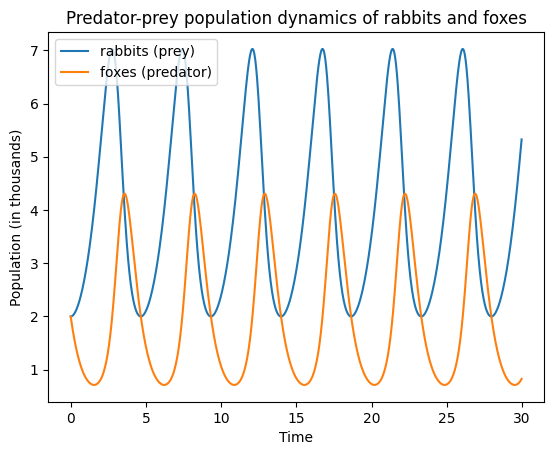

In [4]:
x, y, t = rk(0.0, 30.0, 1000, np.array([2.0, 2.0], float))

#Plotting
plt.plot(t, x, label="rabbits (prey)")
plt.plot(t, y, label="foxes (predator)")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Population (in thousands)")
plt.title("Predator-prey population dynamics of rabbits and foxes")
plt.show()

At the start, the populations of rabbits and foxes are equal. The initial trend is a fall in the population of foxes (predators), since there is not enough rabbits (prey) to sustain them. As the foxes get fewer and fewer, the rate of increase in the rabbit population becomes greater.

Eventually, there is now enough prey to sustain the population of the predators, and both populations experience an uptrend. However, the population of the rabbits eventually reaches a peak. This is due to two reasons:
*   The increase in the population of predators decreases their likelihood of survival
*   The scarcity of resources (food, water, etc.) limits the growth of their population
Now, the population of the prey is on a downtrend while the population of the predators remain in an uptrend. Eventually, there will be too few rabbits again to sustain the population of foxes. Both populations will decline, until the foxes are so few that the rabbits are able to reproduce, beginning another uptrend in their population.

The cycle keeps repeating itself, with a period of approximately five years. The population of foxes begins to increase when there are about 3,500 or more rabbits. The carrying capacity of the rabbit population appears to be at around 7,000. The carrying capacity of the fox population appears to be between 4,000 and 4,500.



### PROBLEM 2

**Nonlinear pendulum**

_Refer to Exercise 8.4 in the Newman text._ Building on the results from Example 8.6, calculate the motion of a nonlinear pendulum as follows.

1. Solve the two first-order equations, Eqs. (8.45) and (8.46), using the fourth-order Runge-Kutta method for a pendulum with a 10 cm arm. Use your program to calculate the angle $\theta$ of displacement for several periods of the pendulum when it is released from a standstill at $\theta = 179^\circ$ from the vertical. *(25 pts.)*

2. Make a graph of $\theta$ as a function of time. *(25 pts.)*


Given equation 8.45, $$\frac{d\theta}{dt} = \omega$$
and 8.46, $$\frac{d\omega}{dt} = -\frac{g}{l}\sin\theta$$
These are rewritten forms of the equation
$$\frac{d^2\theta}{dt^2} = -\frac{g}{l}\sin\theta$$

We can redefine the function `f`.

In [5]:
def f(r, t):
  theta = r[0]
  omega = r[1]
  ftheta = omega
  fomega = -(g/l)*math.sin(theta)

  return np.array([ftheta, fomega], float)

#Defining the constants used in f
g = 9.81
l = 0.1

We can re-use the Runge-Kutta method from the previous problem, with different parameters. Use $t\in[0, 100]$ with initial $[\theta, \omega] = [179.0°, 0.0]$

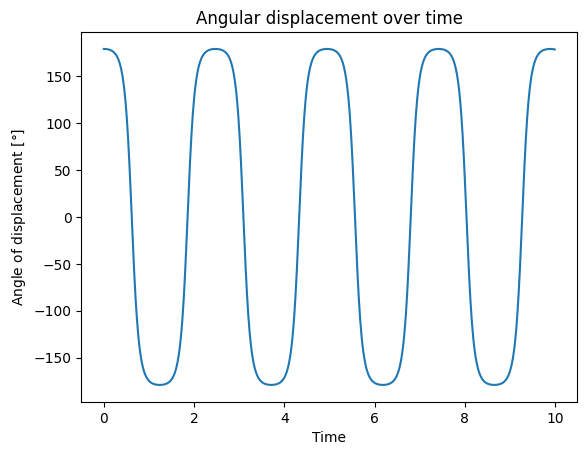

In [6]:
theta, omega, t = rk(0.0, 10.0, 1000, np.array([np.radians(179.0), 0.0], float))
theta = np.degrees(theta)

plt.plot(t, theta)
plt.xlabel("Time")
plt.ylabel("Angle of displacement [$\degree$]")
plt.title("Angular displacement over time")
plt.show()

We can observe the oscillation of the non-linear pendulum. It has an amplitude of 179°, as expected. This behavior is also expected from second-order differential equation we began with.

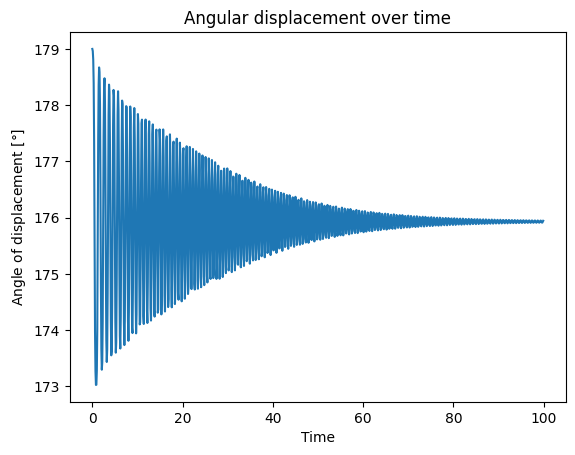

In [7]:
theta, omega, t = rk(0.0, 100.0, 1000, np.array([179.0, 0.0], float))

plt.plot(t, theta)
plt.xlabel("Time")
plt.ylabel("Angle of displacement [$\degree$]")
plt.title("Angular displacement over time")
plt.show()

Something interesting to note is that as we increase the domain of the time $t$, the oscillation appears to be underdamped. From our initial second-order differential equation, we do not expect this to be the case, as it should be undamped.

For a damped non-linear pendulum, we instead use the ODE
$$\frac{d^2\theta}{dt^2} = -\frac{g}{L}\theta - \frac{b}{L}\frac{d\theta}{dt}$$
Thus, we can conclude that while the Runge-Kutta method offers great accuracy, there is a limit to the domain it can handle with reasonable accuracy. For domains as large as tried above, we should use even higher-order Runge-Kutta methods.